In [1]:
%matplotlib inline
import yt
import numpy as np
import deepdish as dd
import matplotlib.pyplot as plt
from scipy.optimize import brentq

from galaxy_analysis.utilities import utilities
from galaxy_analysis.plot.plot_styles import *
from galaxy_analysis.analysis import Galaxy


import time


/home/emerick/anaconda2/lib/python2.7/site-packages/astroML/time_series/periodogram.py:8: UserWarning: Using slow version of lomb_scargle. Install astroML_addons to use an optimized version
  warnings.warn("Using slow version of lomb_scargle. Install astroML_addons "
/home/emerick/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/home/emerick/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [65]:
#
#
# 
#
#
gal = Galaxy('DD0244')


Parsing Hierarchy : 100%|██████████| 3476/3476 [00:00<00:00, 23307.72it/s]


In [66]:
bins = np.logspace(-20, 0, 401)
x    = gal.disk['Fe_Fraction'].value
cm   = gal.disk['cell_mass'].convert_to_units('Msun').value
total_mass = np.sum(cm)*1.0



In [67]:
start = time.time()
hist, temp = np.histogram(x, weights = cm, bins = bins) / total_mass
end = time.time()
elapsed = end-start

In [68]:
start = time.time()

hist2 = np.zeros(np.size(hist))
for i in np.arange(np.size(bins)-1):
    selection = (x >= bins[i]) * (x < bins[i+1])
    hist2[i]  = np.sum( cm[selection])
hist2 = hist2 / total_mass

end = time.time()
elapsed2 = end - start

print elapsed, elapsed2, elapsed/elapsed2

0.385437965393 3.23846197128 0.119018833264


In [69]:
lifetimes = gal.disk[('io','particle_model_lifetime')]


In [2]:
data = dd.io.load('gas_abundances_correct_median_test.h5')
data.keys()

['abundance_fields', 'DD0300', 'DD0100', 'metal_species', 'DD0200', 'species']

In [71]:
data['DD0100']['Disk']['radial_profile']['Fe_over_H'].keys()

['Q1',
 'std',
 'Q3',
 'decile_9',
 'min',
 'max',
 'decile_1',
 'median',
 'inner_quartile_range',
 'd9_d1_range',
 'mode',
 'variance',
 'mean']

In [72]:
data['DD0200']['Disk']['radial_profile']['Fe_over_H']['inner_quartile_range']

array([ 0.27485522,  0.24992582,  0.31906287,  0.43041399,  0.33943884,
        0.22460528,  0.36131207,  0.45736654,  0.44570067,  0.54224304,
        0.49206808,  0.44236402,  0.49245743,  0.38939029,  0.41730324,
        0.76566632,  0.42053176,  0.26178333,  0.29566042,  0.36498978,
        0.27164783,  0.24361914,  0.28134783,  0.20921293,  0.18743556,
        0.24914784,  0.18849526,  0.19068407,  0.21223612,  0.29663075])

In [73]:
data['DD0300']['Disk']['radial_profile']['Fe_over_H']['inner_quartile_range']

array([ 0.02145952,  0.055396  ,  0.1322885 ,  0.20164803,  0.28373627,
        0.1986506 ,  0.40034762,  0.3706354 ,  0.39569188,  0.22270194,
        0.39636613,  0.26863623,  0.5280247 ,  0.48403734,  0.37478645,
        0.48186334,  0.42670651,  0.33838145,  0.46843995,  0.3627131 ,
        0.43562522,  0.28078097,  0.20061729,  0.19444142,  0.2368936 ,
        0.27225896,  0.18140982,  0.22867629,  0.24677157,  0.2012143 ])

In [74]:
data['DD0100']['general']['Time']

99.999990505249002

In [75]:
phase = 'CNM'


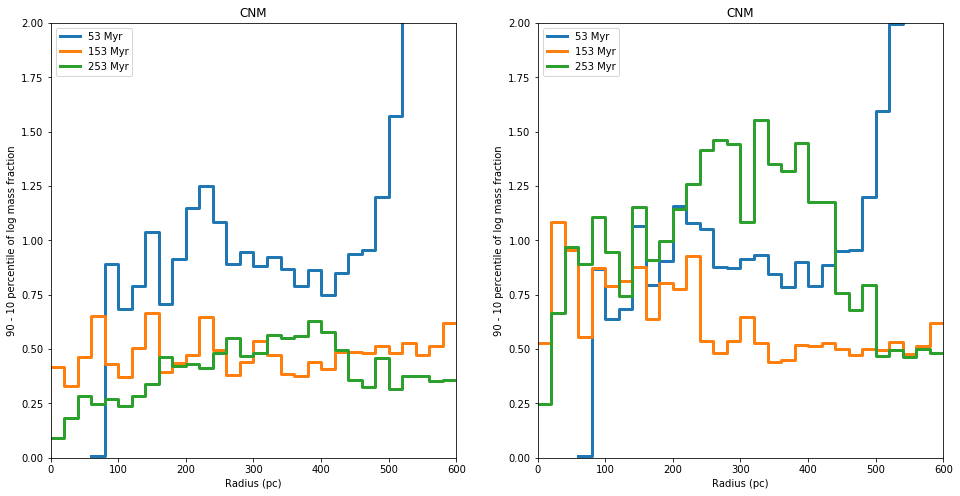

In [77]:
fig,ax = plt.subplots(1,2)
fig.set_size_inches(16,8)

rbins = data['DD0100']['Disk']['radial_profile']['rbins']


for dsname in ['DD0100','DD0200','DD0300']:
    y1 = data[dsname][phase]['radial_profile']['O_Fraction']['decile_9']
    y2 = data[dsname][phase]['radial_profile']['O_Fraction']['decile_1']
    label = data[dsname]['general']['Time'] - 46.0
    iqr = np.log10(y1) - np.log10(y2)
    
    plot_histogram(ax[0], rbins, iqr, lw = 3, label = "%i Myr"%(label))
    
for dsname in ['DD0100','DD0200','DD0300']:
    y1 = data[dsname][phase]['radial_profile']['Ba_Fraction']['decile_9']
    y2 = data[dsname][phase]['radial_profile']['Ba_Fraction']['decile_1']
    label = data[dsname]['general']['Time'] - 46.0
    
    iqr = np.log10(y1) - np.log10(y2)
    
    plot_histogram(ax[1], rbins, iqr, lw = 3, label = "%i Myr"%(label))

for a in ax:
    a.set_xlabel(r'Radius (pc)')
    a.set_ylabel(r'90 - 10 percentile of log mass fraction')
    a.legend(loc='best')
    a.set_xlim(np.min(rbins),np.max(rbins))
    a.set_ylim(0.0, 2.0)
    a.set_title(phase)
    
fig.savefig('radial_' + phase + '_Q90Q10_evolution_O_Ba.png')

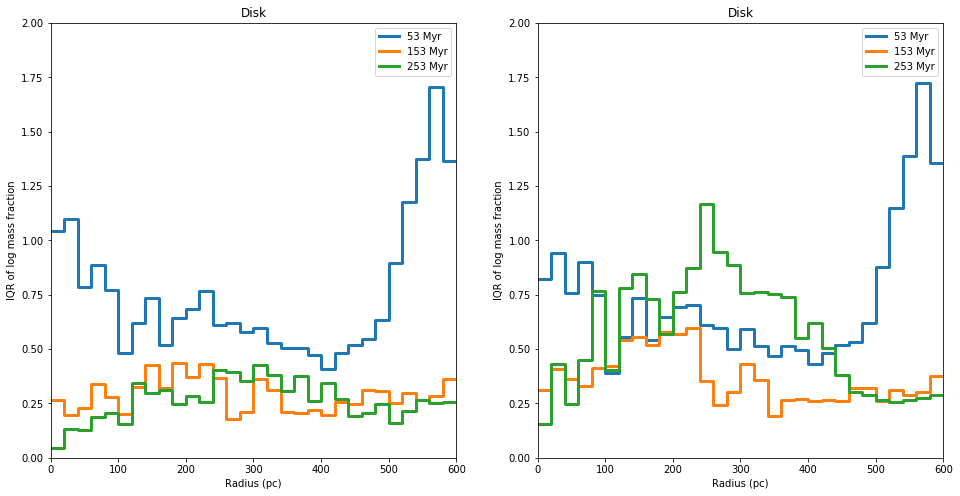

In [78]:
fig,ax = plt.subplots(1,2)
fig.set_size_inches(16,8)

rbins = data['DD0100']['Disk']['radial_profile']['rbins']

phase = 'Disk'


for dsname in ['DD0100','DD0200','DD0300']:
    y1 = data[dsname][phase]['radial_profile']['O_Fraction']['Q3']
    y2 = data[dsname][phase]['radial_profile']['O_Fraction']['Q1']
    label = data[dsname]['general']['Time'] - 46.0
    
    iqr = np.log10(y1) - np.log10(y2)
    
    plot_histogram(ax[0], rbins, iqr, lw = 3, label = "%i Myr"%(label))
    
for dsname in ['DD0100','DD0200','DD0300']:
    y1 = data[dsname][phase]['radial_profile']['Ba_Fraction']['Q3']
    y2 = data[dsname][phase]['radial_profile']['Ba_Fraction']['Q1']
    label = data[dsname]['general']['Time'] - 46.0
    
    iqr = np.log10(y1) - np.log10(y2)
    
    plot_histogram(ax[1], rbins, iqr, lw = 3, label = "%i Myr"%(label))

for a in ax:
    a.set_xlabel(r'Radius (pc)')
    a.set_ylabel(r'IQR of log mass fraction')
    a.legend(loc='best')
    a.set_xlim(np.min(rbins),np.max(rbins))
    a.set_ylim(0.0, 2.0)
    a.set_title(phase)
    
fig.savefig('radial_' + phase + '_IQR_evolution_O_Ba.png')

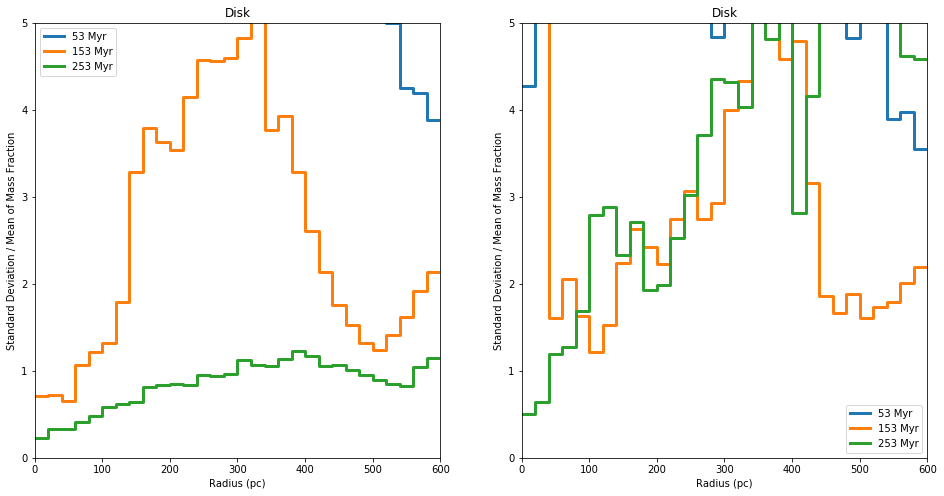

In [79]:
fig,ax = plt.subplots(1,2)
fig.set_size_inches(16,8)

rbins = data['DD0100']['Disk']['radial_profile']['rbins']


for dsname in ['DD0100','DD0200','DD0300']:
    std = data[dsname][phase]['radial_profile']['O_Fraction']['std']
    u = data[dsname][phase]['radial_profile']['O_Fraction']['mean']
    label = data[dsname]['general']['Time'] - 46.0
    #log_std = np.exp( u + 0.5 * std * std)
    
    
    plot_histogram(ax[0], rbins, std / u, lw = 3, label = "%i Myr"%(label))
    
for dsname in ['DD0100','DD0200','DD0300']:
    std = data[dsname][phase]['radial_profile']['Ba_Fraction']['std']
    u = data[dsname][phase]['radial_profile']['Ba_Fraction']['mean']
    label = data[dsname]['general']['Time'] - 46.0
    #log_std = np.exp( u + 0.5 * std * std)
    
    plot_histogram(ax[1], rbins, std / u, lw = 3, label = "%i Myr"%(label))

for a in ax:
    a.set_xlabel(r'Radius (pc)')
    a.set_ylabel(r'Standard Deviation / Mean of Mass Fraction')
    a.legend(loc='best')
    a.set_xlim(np.min(rbins),np.max(rbins))
    a.set_ylim(0.0, 5.0)
    a.set_title(phase)
    
fig.savefig('radial_' + phase + '_std_evolution_O_Ba.png')

In [ ]:
rbins = np.arange(0.0, 520.0, 20.0) * yt.units.pc
fields = ['Fe_Fraction','N_Fraction','O_Fraction','Ba_Fraction','Si_Fraction','Mn_Fraction','C_Fraction','Y_Fraction','Sr_Fraction','S_Fraction']

profiles = {}

for field in fields:
    median = np.zeros(np.size(rbins)-1)
    q0     = np.zeros(np.size(rbins)-1)
    q1     = np.zeros(np.size(rbins)-1)
    q2     = np.zeros(np.size(rbins)-1)
    q3     = np.zeros(np.size(rbins)-1)
    
    IQR    = np.zeros(np.size(rbins)-1)
    QR     = np.zeros(np.size(rbins)-1)

    f_bins = np.arange(-20, 2.1, 0.1)
    r_centers = 0.5 *( rbins[:-1] + rbins[1:])

    for i in np.arange(np.size(rbins)-1):
        selection  = (gal.disk['cylindrical_radius'] < rbins[i+1]) * (gal.disk['cylindrical_radius'] >= rbins[i])
        selection  = selection * (gal.disk['Temperature'] < 1000.0)
        x          = np.log10(gal.disk[field][selection])
        w          = gal.disk['cell_mass'][selection]
        hist, bins = np.histogram( x, weights = w, bins = f_bins)
        centers    = 0.5 * (bins[1:] + bins[:-1])
        hist       = hist / (1.0 * np.sum(hist))
        cumhist    = np.cumsum(hist)
        median[i]  = centers[ np.argmax(hist) ]
    
        f = lambda ix, p : np.interp(ix, centers, cumhist) - p
        q0[i]      = brentq(f, np.min(centers), np.max(centers), args = (0.25,))
        q1[i]      = brentq(f, np.min(centers), np.max(centers), args = (0.75,))
        q2[i]      = brentq(f, np.min(centers),np.max(centers), args = (0.10,))
        q3[i]      = brentq(f, np.min(centers),np.max(centers), args = (0.90,))
    
        IQR[i] = q1[i] - q0[i]
        QR[i]  = q3[i] - q2[i]
        
    profiles[field] = {'median' : median, 'q0':q0,'q1':q1,'IQR':IQR, '90p':QR}

    
print IQR


In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(8,8)


for field in fields:
    ax.plot(r_centers, profiles[field]['IQR'], lw = 3, label = field)
ax.set_xlabel(r'Radius (pc)')
ax.set_ylabel(r'IQR size')
ax.legend(loc='best')


In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(8,8)


for field in fields:
    ax.plot(r_centers, profiles[field]['90p'], lw = 3, label = field)
ax.set_xlabel(r'Radius (pc)')
ax.set_ylabel(r'10 - 90 percent spread')
ax.legend(loc='best')

In [ ]:
rbins = np.arange(0.0, 520.0, 20.0) * yt.units.pc
fields = ['Fe_Fraction','N_Fraction','O_Fraction','Ba_Fraction','Si_Fraction','Mn_Fraction','C_Fraction','Y_Fraction','Sr_Fraction','S_Fraction']

particle_profiles = {}

dt_star = 100.0 * yt.units.Myr

for field in fields:
    _field = field.split('_F')[0]
    _field = 'particle_' + _field + '_fraction'
    
    median = np.zeros(np.size(rbins)-1)
    q0     = np.zeros(np.size(rbins)-1)
    q1     = np.zeros(np.size(rbins)-1)
    q2     = np.zeros(np.size(rbins)-1)
    q3     = np.zeros(np.size(rbins)-1)
    
    IQR    = np.zeros(np.size(rbins)-1)
    QR     = np.zeros(np.size(rbins)-1)

    f_bins = np.arange(-20, 2.1, 0.1)
    r_centers = 0.5 *( rbins[:-1] + rbins[1:])

    for i in np.arange(np.size(rbins)-1):
        selection  = (gal.disk['particle_position_cylindrical_radius'] < rbins[i+1]) *\
                     (gal.disk['particle_position_cylindrical_radius'] >= rbins[i])*\
                     (gal.disk['particle_type'] == 11) *\
                     (gal.disk['creation_time'] < gal.ds.current_time)*\
                     ((lifetimes + gal.disk['creation_time']) > gal.ds.current_time)*\
                     (np.abs(gal.disk['creation_time'] - gal.ds.current_time) < dt_star)
        
        x          = np.log10(gal.disk[_field][selection])
        # w          = gal.disk['cell_mass'][selection]
        hist, bins = np.histogram( x, bins = f_bins)
        centers    = 0.5 * (bins[1:] + bins[:-1])
        hist       = hist / (1.0 * np.sum(hist))
        cumhist    = np.cumsum(hist)
        median[i]  = centers[ np.argmax(hist) ]
    
        f = lambda ix, p : np.interp(ix, centers, cumhist) - p
        q0[i]      = brentq(f, np.min(centers), np.max(centers), args = (0.25,))
        q1[i]      = brentq(f, np.min(centers), np.max(centers), args = (0.75,))
        q2[i]      = brentq(f, np.min(centers),np.max(centers), args = (0.10,))
        q3[i]      = brentq(f, np.min(centers),np.max(centers), args = (0.90,))
    
        IQR[i] = q1[i] - q0[i]
        QR[i]  = q3[i] - q2[i]
        
    particle_profiles[field] = {'median' : median, 'q0':q0,'q1':q1,'IQR':IQR, '90p':QR}

    
print IQR


In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(8,8)


for i,field in enumerate(['Ba_Fraction','O_Fraction']):
    color = 'C%i'%(i)
    ax.plot(r_centers, profiles[field]['IQR'], lw = 3, label = field, color = color)
    ax.plot(r_centers, particle_profiles[field]['IQR'], lw = 3, ls = '--', color = color)
    print particle_profiles[field]['IQR']
ax.set_xlabel(r'Radius (pc)')
ax.set_ylabel(r'IQR size')
ax.legend(loc='best')

In [ ]:
smedian = np.zeros(np.size(rbins)-1)
sq0     = np.zeros(np.size(rbins)-1)
sq1     = np.zeros(np.size(rbins)-1)
sIQR    = np.zeros(np.size(rbins)-1)

for i in np.arange(np.size(rbins)-1):
    selection  = (gal.disk['cylindrical_radius'] < rbins[i+1]) * (gal.disk['cylindrical_radius'] >= rbins[i])
    x          = gal.disk[field][selection]
    w          = gal.disk['cell_mass'][selection]
    hist, bins = np.histogram( x, weights = w)
    centers    = 0.5 * (bins[1:] + bins[:-1])
    hist       = hist / (1.0 * np.sum(hist))
    cumhist    = np.cumsum(hist)
    median[i]  = centers[ np.argmax(hist) ]
    
    f = lambda ix, p : np.interp(ix, centers, cumhist) - p
    
    q0[i]      = brentq(f, np.min(x), np.max(x), args = (0.25,))
    q1[i]      = brentq(f, np.min(x), np.max(x), args = (0.75,))
    
    IQR[i] = q1[i] - q[i]

In [ ]:
fig,ax = plt.subplots(1,2)
fig.set_size_inches(16,8)

fbins = np.log10(data['DD0100']['Disk']['mass_fraction']['bins'])

phase = 'Molecular'
ylim = [0.0,0.15]

for i,dsname in enumerate(['DD0100','DD0200','DD0300']):
    y = data[dsname][phase]['mass_fraction']['O_Fraction']['hist']
    median = data[dsname][phase]['mass_fraction']['O_Fraction']['median']
    u = data[dsname][phase]['mass_fraction']['O_Fraction']['mean']


    label = data[dsname]['general']['Time'] - 46.0
    #log_std = np.exp( u + 0.5 * std * std)
    
    
    plot_histogram(ax[0],fbins - np.log10(median), y, lw = 3, label = "%i Myr"%(label),color = 'C%i'%(i))
    ax[0].plot( 2*[np.log10(u) - np.log10(median)], ylim , lw = 2, ls = '--', color = 'C%i'%(i))
    
for i,dsname in enumerate(['DD0100','DD0200','DD0300']):
    y = data[dsname][phase]['mass_fraction']['Ba_Fraction']['hist']
    median = data[dsname][phase]['mass_fraction']['Ba_Fraction']['median']
    u = data[dsname][phase]['mass_fraction']['Ba_Fraction']['mean']

    label = data[dsname]['general']['Time'] - 46.0
    #log_std = np.exp( u + 0.5 * std * std)
    
    plot_histogram(ax[1], fbins - np.log10(median), y, lw = 3, label = "%i Myr"%(label),color = 'C%i'%(i))
    ax[1].plot( 2*[np.log10(u) - np.log10(median)], ylim , lw = 2, ls = '--', color = 'C%i'%(i))

for a in ax:
    a.set_xlabel(r'log(Element Mass Fraction) - log(Median)')
    a.set_ylabel(r'Mass in Bin / ' + phase + ' Mass')
    a.set_xlim(-2,2)
    a.set_ylim(ylim )
    a.plot([0.0,0.0], a.get_ylim(), lw = 1.5, ls = ':', color = 'black')
    a.minorticks_on()

#ax[0].annotate(phase,xy=(-1.9,0.11),xytext=(-1.9,0.11))
#ax[1].annotate(phase,xy=(-1.9,0.11),xytext=(-1.9,0.11))
xy = (-1.9, ylim[1]*0.92)
ax[0].annotate(phase + ': Oxygen',xy=xy,xytext=xy)
ax[1].annotate(phase + ': Barium',xy=xy,xytext=xy)

ax[0].legend(loc='upper right')
    
fig.savefig(phase + '_O_Ba_histograms.png')
print u

In [ ]:
a.minorticks_on

In [ ]:
data['DD0100']['Disk']['mass_fraction'].keys()

In [ ]:
test = np.random.normal(100000, 100000, 100000)
test = test[test>0]

bins = np.arange(np.min(test), np.max(test),1000)
hist, bins = np.histogram(test,bins=bins)

fig,ax = plt.subplots(1,2) 
fig.set_size_inches(16,8)

plot_histogram(ax[0], bins, hist/np.max(hist))
ax[0].set_xlim(np.min(bins),np.max(bins))
ax[0].set_ylim(0.0, 1.05)
ax[0].minorticks_on()

bins2 = np.logspace(np.log10(np.min(bins)), np.log10(np.max(bins)), np.size(bins))

hist2,bins2 = np.histogram(test, bins= bins2)
plot_histogram(ax[1], bins2, hist2 / np.max(hist2))
ax[1].set_xlim(np.min(bins2),np.max(bins2))
ax[1].set_ylim(ax[0].get_ylim())
ax[1].minorticks_on()

print np.mean(test), np.median(test)
print 10.0**(np.mean(np.log10(test))), 10.0**(np.median(np.log10(test)))

In [153]:
from scipy.optimize import curve_fit
from scipy import stats


def lognorm(x, mu, sigma):
    fx  = (1.0 / (x * sigma * np.sqrt(2.0*np.pi)))
    fx *= np.exp( -1.0 * (np.log(x) - mu)**2 / (2.0 * sigma * sigma))
    return fx

#def lognorm(x, mu, sigma, A):
#    fx  = (1.0 / (x * sigma * np.sqrt(2.0*np.pi)))
#    fx *= np.exp( -1.0 * (np.log(x) - mu)**2 / (2.0 * sigma * sigma))
#    return fx

def fit_lognorm(unlog_x, data_pdf, *args, **kwargs):
    
    popt, pcov = curve_fit(lognorm, unlog_x, data_pdf, **kwargs)
    
    return popt, pcov
    

def plot_and_fit(ax, bins, y, mean = None, std = None, xlog = True, label = None, color = 'black',
                 median = None, center_on_median = False, fit_color = 'black'):
    # bins must be un-logged
    
    binsize = bins[1:] - bins[:-1]
    centers = 0.5 * (bins[1:] + bins[:-1])
    
    # normalize y, which sums to 1, to PDF, which integrates to unity
    norm_y = y / binsize
    plot_bins = bins
    
    plot_median = median
    if median is not None:
        if xlog:
            plot_median = np.log10(median)
    else:
        center_on_median = False
    
    plot_bins = bins
    plot_centers = centers
    if xlog:
        plot_bins = np.log10(bins)
        plot_centers = np.log10(centers)
        
    if center_on_median:
        plot_bins -= np.log10(median)
        plot_centers -= np.log10(median)
    
    # show histogram
    plot_histogram(ax, plot_bins, norm_y, lw = 3, label = label, color = color)
    
    if mean is not None:
        plot_mean = mean
        
        if xlog:
            plot_mean = np.log10(plot_mean)
            
        # plot vertical line at mean - 
        if center_on_median:
            plot_mean -= plot_median
        
        # ax.plot( 2*[plot_mean], [np.min(norm_y), np.max(norm_y)], lw = 2, color = color, ls = '--')
        

    
    # now fit the data:
    selection = (y > 0) * (mean > (mean - 2)) * (mean < (mean+2))
    fit_x     = centers[selection]
    y_to_fit  = norm_y[selection]
    
    # take initial guess parameters from distribution values - compute logged dist values
    u_guess   = np.log( mean / (np.sqrt(1.0 + std*std/(mean*mean))))
    std_guess = np.sqrt(np.log(1.0 + std*std/(mean*mean)))
    
    # now fit the data
    popt, pcov = fit_lognorm(fit_x, y_to_fit, p0 = [u_guess, std_guess]) #     
    xplot = np.logspace(np.log10(np.min(fit_x)), np.log10(np.max(fit_x)),4000)
    yplot = lognorm(xplot, *popt)
    
    if xlog:
        xplot = np.log10(xplot)
    if center_on_median:
        xplot -= plot_median

    ax.plot(xplot, yplot, lw = 3, color =fit_color , ls = '--') #, label = 'Fit')     
    # print np.min(yplot),np.max(yplot)
    # ax.plot(fit_x, lognorm(unlog_x, logu, logstd), lw = 2, color = 'black', ls = '-')
    
    if median is not None:
        if center_on_median:
            plot_median = 0.0
            
        #ax.plot( 2*[plot_median], [np.min(norm_y), np.max(norm_y)], lw = 2, color = color, ls = ':')

        ax.set_xlim( median-2, median+2)

    plot_select = (plot_centers >= ax.get_xlim()[0]) * (plot_centers <= ax.get_xlim()[1])
    ymin = np.min(norm_y[plot_select])
    ymax = np.max(norm_y[plot_select])   
    ax.set_ylim( ymin, ymax)
        
 
    return popt, pcov


/home/emerick/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in log10


Oxygen [-12.95810103   1.09978853]
Barium [-32.50915139   1.06461841]
Oxygen [-10.69187108   1.43758302]
Barium [ -5.41511687  18.10301364]
Oxygen [-8.91227584  1.85346949]
Barium [-28.35154219   1.76541306]
Oxygen [-11.16613666   0.32605697]
Barium [-30.66697284   0.33672766]
Oxygen [-9.52786721  0.71809096]
Barium [-28.98191976   0.70689208]
Oxygen [-7.60773504  1.39118102]
Barium [-27.17419216   1.19445859]
Oxygen [-10.73471946   0.35949512]
Barium [-30.0311784   0.4101771]
Oxygen [-9.58937556  0.58666302]
Barium [-28.97084917   0.64522356]
Oxygen [-7.17836972  0.64949745]
Barium [-26.22810745   0.75298448]
8.55815968195e-12


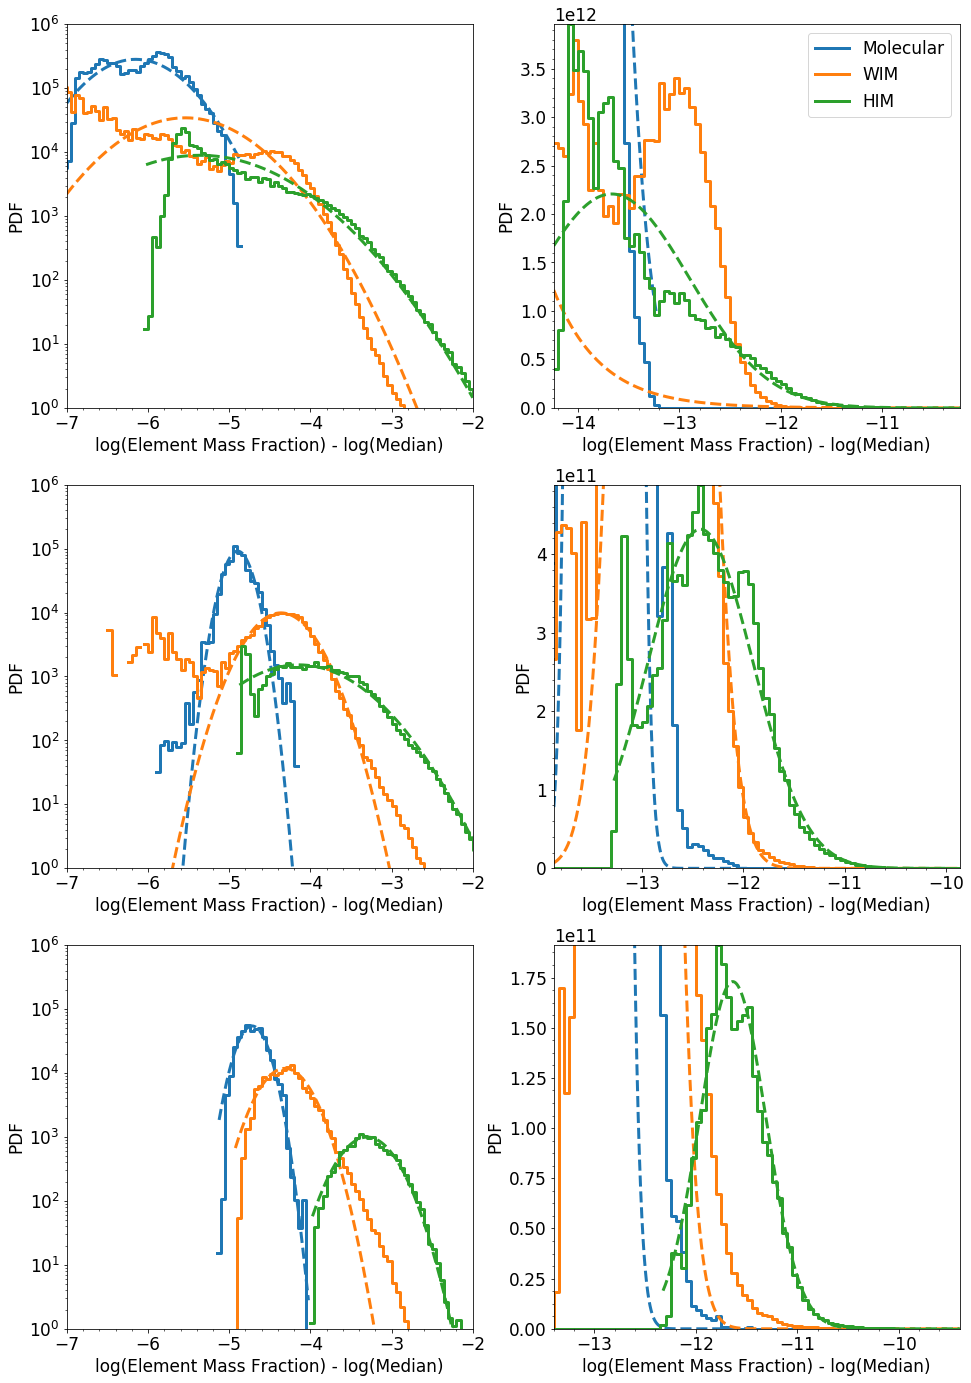

In [159]:
fig,ax = plt.subplots(3,2)
fig.set_size_inches(16,24)

fbins   = data['DD0100']['Disk']['mass_fraction']['bins']
binsize =       (fbins[1:]) - (fbins[:-1])
centers = 0.5 * (fbins[1:] + fbins[:-1])


phase = 'CNM'
ylim = [0.0,6]

for j,dsname in enumerate(['DD0100','DD0200','DD0300']):
    for i,phase in enumerate(['Molecular','WIM','HIM']):
        y = data[dsname][phase]['mass_fraction']['O_Fraction']['hist']
        u = data[dsname][phase]['mass_fraction']['O_Fraction']['mean']
        std = data[dsname][phase]['mass_fraction']['O_Fraction']['std']
        median = np.log10(np.interp(0.5, np.cumsum(y)/(1.0*np.sum(y)), centers))
        label = data[dsname]['general']['Time'] - 46.0
    
        plot_bins = fbins
    
        popt, pcov = plot_and_fit(ax[(j,0)], plot_bins, y, mean = u, std = std, label = phase, color = 'C%i'%(i),
                              median = median, center_on_median=False, fit_color = 'C%i'%(i))
        print 'Oxygen', popt  
        ax[(j,0)].set_xlim(-7,-2)
        ax[(j,0)].semilogy()
        ax[(j,0)].set_ylim(1.0, 1.0E6)



# --------------------------------------------------------------------------    
        y = data[dsname][phase]['mass_fraction']['Ba_Fraction']['hist']
        u = data[dsname][phase]['mass_fraction']['Ba_Fraction']['mean']
        std = data[dsname][phase]['mass_fraction']['Ba_Fraction']['std']
        median = np.log10( np.interp(0.5, np.cumsum(y)/(1.0*np.sum(y)), centers))
        plot_bins = 1.0 * fbins
        popt, pcov = plot_and_fit(ax[(j,1)], fbins, y, mean = u, std = std, label = phase, color = 'C%i'%(i),
                              median = median, fit_color = 'C%i'%(i))
        print 'Barium', popt  
ax[(0,1)].legend(loc='upper right')
   
for i in np.arange(3):
    #ax[(i,0)].annotate(phase + ': Oxygen',xy=xy,xytext=xy)
    #ax[(i,1)].annotate(phase + ': Barium',xy=xy,xytext=xy)
    #ax[(i,0)].set_xlim(-7,-4)
    
    #ax[(i,0)].set_ylim(10.0,3.0E5)
    #ax[(i,1)].set_ylim(1.0E9,1.0E15)
    for a in [ax[(i,0)],ax[(i,1)]]:
        a.set_xlabel(r'log(Element Mass Fraction) - log(Median)')
        a.set_ylabel(r'PDF')
        #a.set_xlim(-2,2)
        #a.set_ylim(ylim )
        #a.semilogy()
        a.plot([0.0,0.0], a.get_ylim(), lw = 1.5, ls = ':', color = 'black')
        a.minorticks_on()

#ax[0].annotate(phase,xy=(-1.9,0.11),xytext=(-1.9,0.11))
#ax[1].annotate(phase,xy=(-1.9,0.11),xytext=(-1.9,0.11))

#ax[0].legend(loc='upper right')
    
fig.savefig(phase + '_O_Ba_PDF_lognorm.png')
print u

Oxygen [-9.52786721  0.71809096]
Barium [-28.98191976   0.70689208]
Oxygen [-9.58937556  0.58666302]
Barium [-28.97084917   0.64522356]
9.41213070165e-13


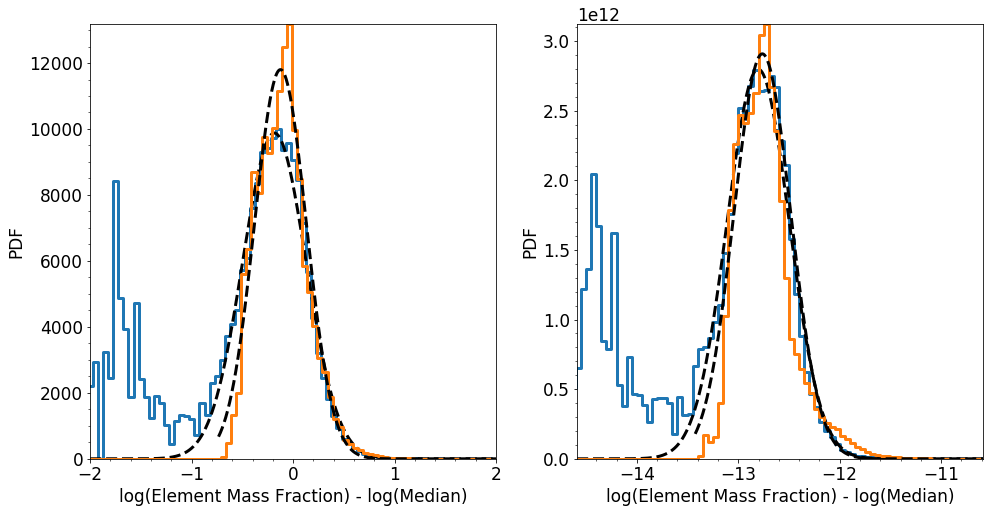

In [158]:
fig,ax = plt.subplots(1,2)
fig.set_size_inches(16,8)

fbins   = data['DD0100']['Disk']['mass_fraction']['bins']
binsize =       (fbins[1:]) - (fbins[:-1])
centers = 0.5 * (fbins[1:] + fbins[:-1])


phase = 'WIM'
ylim = [0.0,6]

for i,dsname in enumerate(['DD0200','DD0300']):
    y = data[dsname][phase]['mass_fraction']['O_Fraction']['hist']
    u = data[dsname][phase]['mass_fraction']['O_Fraction']['mean']
    std = data[dsname][phase]['mass_fraction']['O_Fraction']['std']
    median = np.interp(0.5, np.cumsum(y)/(1.0*np.sum(y)), centers)
    label = data[dsname]['general']['Time'] - 46.0
    
    plot_bins = fbins
    
    popt, pcov = plot_and_fit(ax[0], plot_bins, y, mean = u, std = std, label = label, color = 'C%i'%(i),
                              median = median, center_on_median=True)
    print 'Oxygen', popt  
    ax[0].set_xlim(-2, 2)
# --------------------------------------------------------------------------    
    y = data[dsname][phase]['mass_fraction']['Ba_Fraction']['hist']
    u = data[dsname][phase]['mass_fraction']['Ba_Fraction']['mean']
    std = data[dsname][phase]['mass_fraction']['Ba_Fraction']['std']
    median = np.log10( np.interp(0.5, np.cumsum(y)/(1.0*np.sum(y)), centers))
    plot_bins = 1.0 * fbins
    popt, pcov = plot_and_fit(ax[1], fbins, y, mean = u, std = std, label = label, color = 'C%i'%(i))
    print 'Barium', popt  
    ax[1].set_xlim( median-2, median+2)
    
for a in ax:
    #ax[(i,0)].annotate(phase + ': Oxygen',xy=xy,xytext=xy)
    #ax[(i,1)].annotate(phase + ': Barium',xy=xy,xytext=xy)
    #ax[(i,0)].set_xlim(-7,-4)
    
    #ax[(i,0)].set_ylim(10.0,3.0E5)
    #ax[(i,1)].set_ylim(1.0E9,1.0E15)
    #for a in [ax[(i,0)],ax[(i,1)]]:
    a.set_xlabel(r'log(Element Mass Fraction) - log(Median)')
    a.set_ylabel(r'PDF')
    #a.set_xlim(-2,2)
    #a.set_ylim(ylim )
    #a.semilogy()
    #a.plot([0.0,0.0], a.get_ylim(), lw = 1.5, ls = ':', color = 'black')
    a.minorticks_on()

#ax[0].annotate(phase,xy=(-1.9,0.11),xytext=(-1.9,0.11))
#ax[1].annotate(phase,xy=(-1.9,0.11),xytext=(-1.9,0.11))

#ax[0].legend(loc='upper right')
    
fig.savefig(phase + '_O_Ba_PDF_lognorm.png')
print u

In [46]:
print np.trapz(y, x = 10**centers)
print np.trapz(yfit, x = 10**fit_x)



1.00165730073
1.00221058874


In [ ]:
   
    #log_std = np.exp( u + 0.5 * std * std)
    plot_histogram(ax[(i,0)],fbins, y, lw = 3, label = "%i Myr"%(label),color = 'C%i'%(i))
    ax[(i,0)].plot( 2*[np.log10(u)], ylim , lw = 2, ls = '--', color = 'C%i'%(i))
    ax[(i,0)].plot( 2*[median], ylim , lw = 2, ls = ':', color = 'black')
    
    
    # try and fit only region around PDF
    selection = (y > 0)
    fit_x    = centers[selection]
    y_to_fit = y[selection]
    unlog_x = 10.0**(fit_x)
 
    print 'unlogx', np.min(unlog_x), np.max(unlog_x)
    logu = np.log( u / (np.sqrt( 1.0 + std*std/(u*u))))
    logstd = np.sqrt(np.log(1.0 + std*std/(u*u)))
    print 'logmean logstd', logu, logstd
    popt, pcov = fit_lognorm(unlog_x, y_to_fit, p0 = [logu, logstd]) #, 
                                    #bounds = ( [np.exp(-17),1.0E-4],[np.exp(-8),np.inf]))
    
    ax[(i,0)].plot(fit_x, lognorm(unlog_x, logu, logstd), lw = 2, color = 'black', ls = '-')
    xplot = np.logspace(np.min(fit_x), np.max(fit_x),4000)
    ax[(i,0)].plot(np.log10(xplot), lognorm(xplot, *popt), lw = 2, color = 'red', ls = '--')


In [ ]:
    y = y / binsize
    label = data[dsname]['general']['Time'] - 46.0
    #log_std = np.exp( u + 0.5 * std * std)
    
    plot_histogram(ax[(i,1)], fbins, y, lw = 3, label = "%i Myr"%(label),color = 'C%i'%(i))
    ax[(i,1)].plot( 2*[np.log10(u)], ylim , lw = 2, ls = '--', color = 'C%i'%(i))
    ax[(i,1)].plot( 2*[median], ylim , lw = 2, ls = ':', color = 'black')

    ax[(i,1)].set_xlim( median-2, median+2)
    # try and fit only region around PDF
    xlow, xup = median - 2, median + 2
    selection = (y > 0)
    fit_x    = centers[selection]
    y_to_fit = y[selection]
    unlog_x = 10.0**(fit_x)
 
    print 'unlogx', np.min(unlog_x), np.max(unlog_x)
    logu = np.log( u / (np.sqrt( 1.0 + std*std/(u*u))))
    logstd = np.sqrt(np.log(1.0 + std*std/(u*u)))
    print 'logmean logstd', logu, logstd
    popt, pcov = fit_lognorm(unlog_x, y_to_fit, p0 = [logu, logstd]) #, 
                                    #bounds = ( [np.exp(-17),1.0E-4],[np.exp(-8),np.inf]))
    
    yfit = lognorm(unlog_x, logu, logstd)
    
    ax[(i,1)].plot(fit_x, yfit, lw = 2, color = 'black', ls = '-')